## Lecture 9 Simulations and Examples of Eigenvalues/Eigenvectors

In [1]:
#load needed modules 
import numpy as np
from numpy import linalg
from hdf5storage import loadmat
from matplotlib import pyplot as plt

## Simulation 1 Eigenvalues and Eigenvectors of a Square Symmetric matrix 

In [2]:
A = np.array([[2 ,-1],[-1,3]])  
d,v = linalg.eig(A) #calculate eigenvalues(d) and eigenvectors(v)
z = np.transpose(v)@A@v #show that transformed matrix is diagonal 

#### Lets do some examining of numbers and sanity check

In [3]:
print('A')
print(A)

A
[[ 2 -1]
 [-1  3]]


In [4]:
print('z')
print(z)

z
[[ 1.38196601e+00 -1.11022302e-16]
 [-2.22044605e-16  3.61803399e+00]]


#### Examing the eigenvalues and eigenvectors 

In [5]:
print('Eigenvalues are in d')
print(d)
print('Eigenvectors are in in v')
print(v)

Eigenvalues are in d
[1.38196601 3.61803399]
Eigenvectors are in in v
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]


In [6]:
x = np.sqrt(np.sum(v[:,0]**2))
print(x)
unit= linalg.norm(v[:,0])
print(unit)

0.9999999999999999
0.9999999999999999


## Simulation 2 Example EEG data 

#### I am going to look at 4 secs of EEG data sampled at 1000 samples per second.  There are two channels, 1 Occipital channel (Oz) and 1 Frontal channel (Fz).
#### First I will remove the mean of each channel, then compute the covariance and correlation matrices. 

In [7]:
eeg = loadmat('data/eeg.mat') #Load 2 channels of EEG
occ = eeg['Occ'][0]
occ = occ - np.mean(occ) #I need to center the data and remove the mean. 
fro = eeg['Fro'][0]
fro = fro -np.mean(fro) #I need to follow my own rule and remove the mean.
nsamp = len(fro)
time = np.arange(0,nsamp,1)
data = np.array([occ,fro]) #put them together in a matrix
Cdata = np.cov(data,bias = True) #compute covariance - note that this computation divides by n-1 as it is "unbiased" 
Cmult = (1/(nsamp))*(data@np.transpose(data)) #compute covariance by matrix multiplication
Rdata = np.corrcoef(data)

In [8]:
print('Covariance matrix')
print(Cdata)
print('Covariance matrix by Multiplication')
print(Cmult)
print('Correlation matrix')
print(Rdata)

Covariance matrix
[[1203.80900831 -449.57090848]
 [-449.57090848  652.70685213]]
Covariance matrix by Multiplication
[[1203.80900831 -449.57090848]
 [-449.57090848  652.70685213]]
Correlation matrix
[[ 1.        -0.5071779]
 [-0.5071779  1.       ]]


#### The covariance matrix is sometimes called the inner product. It contains all the possible dot products between variables.  

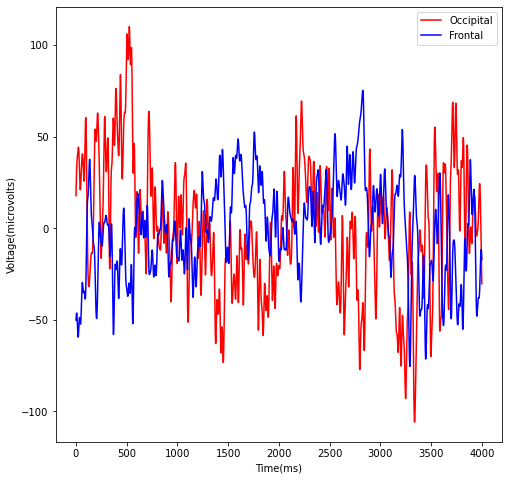

In [9]:
plt.figure(figsize = (8,8))
plt.plot(time,occ,'r')
plt.plot(time,fro,'b')
plt.legend(('Occipital','Frontal'))
plt.xlabel('Time(ms)')
plt.ylabel('Voltage(microvolts)')
plt.show()

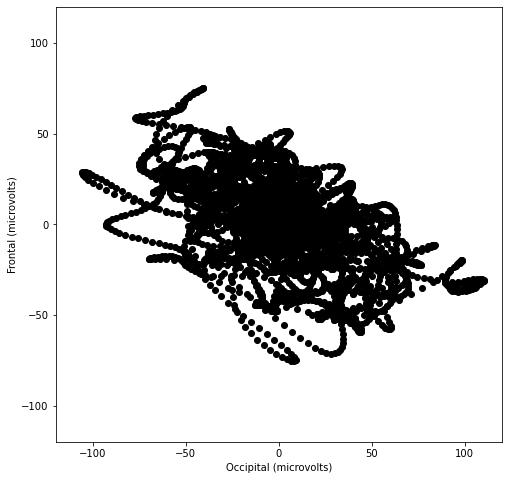

In [10]:
plt.figure(figsize =(8,8))
plt.plot(occ,fro,'ko')
plt.xlabel('Occipital (microvolts)')
plt.ylabel('Frontal (microvolts)')
plt.xlim((-120,120))
plt.ylim((-120,120))
plt.show()

#### In the next code block, I calculate the eigenvalues and eigenvectors of the covariance matrix.  
#### And then transform (rotate) the variables into a new coordinate system using the eigenvectors. 
#### The new variables, indicated here by the *prime* are known as **Principal Components**

In [11]:
d,v = linalg.eig(Cdata) #Compute Eigenvalues and Eigenvectors of C
xprime = v[:,0]@data #project data onto new variables by a weighted sum
yprime = v[:,1]@data 
xyprime = np.transpose(v)@data #project data onto rotated variables (prinicpal components) by matrix multiplication in 1 step.  
Cprime = np.cov(xyprime) #covariance matrix of the prinicpal components 
Rprime = np.corrcoef(xyprime) #correlation matrix of the principal components
datarecovered  = v@xyprime #show that this is invertible, I can get back xy from xyprime by matrix multiplication. 

Text(0, 0.5, 'Channel Frontal recovered')

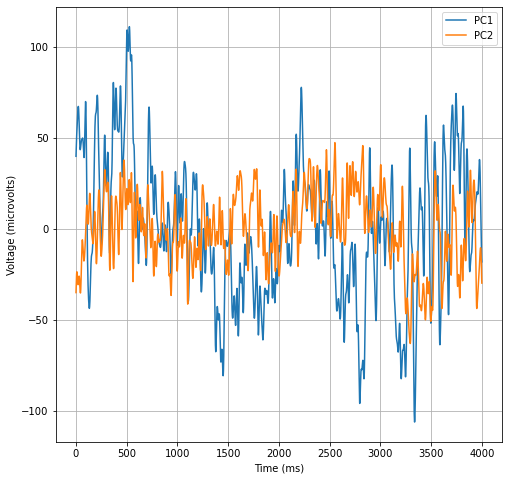

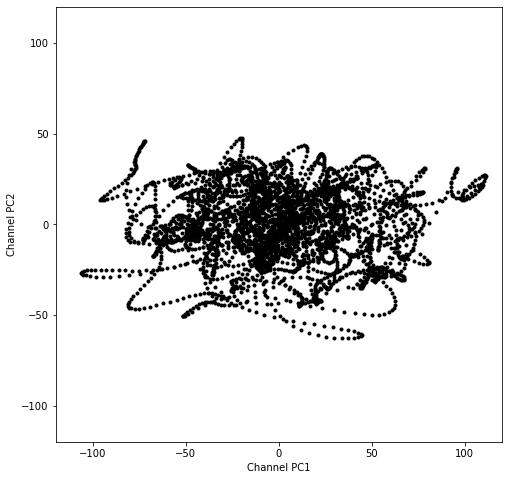

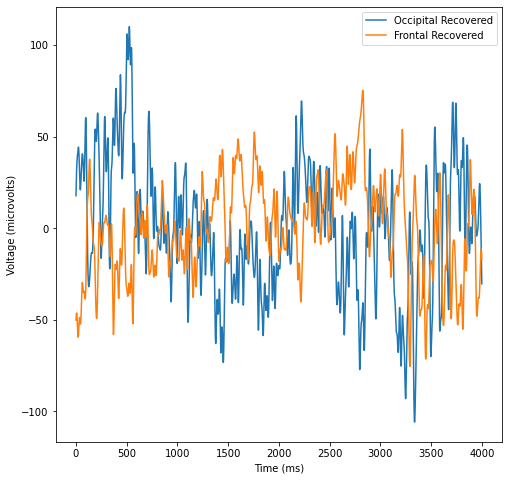

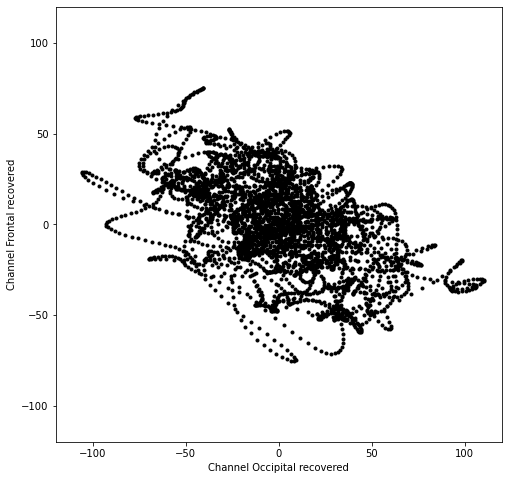

In [12]:

#%% PLOT THE COMPONENT SCORES
plt.figure(figsize = (8,8))
plt.plot(xyprime[0,:],label = 'PC1')
plt.plot(xyprime[1,:],label = 'PC2')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (microvolts)')
plt.grid()
plt.legend()
plt.figure(figsize=(8,8))
plt.plot(xyprime[0,:],xyprime[1,:],'k.')
plt.xlim((-120,120))
plt.ylim((-120,120))
plt.xlabel('Channel PC1')
plt.ylabel('Channel PC2')
#%%PLOT THE RECOVERED DATA FROM INVERTING THE TRANSFORMATION
plt.figure(figsize=(8,8))
plt.plot(time,datarecovered[0,:],label = 'Occipital Recovered')
plt.plot(time,datarecovered[1,:],label = 'Frontal Recovered')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (microvolts)')
plt.legend()
plt.figure(figsize = (8,8))
plt.plot(datarecovered[0,:],datarecovered[1,:],'k.')
plt.xlim((-120,120))
plt.ylim((-120,120))

plt.xlabel('Channel Occipital recovered')
plt.ylabel('Channel Frontal recovered')

### Interpreting eigenvalues, eigenvectors, and **principal components**

#### The critical step in interpretation is to understand the information in the eigenvalues. 
#### The eigenvalues are reporting the variance of each principal component.  
#### Its often useful to represent them as a fraction of total variance to improve interpretation.  

In [13]:
print('Eigenvalues')
print(d)
fractional_d = d/np.sum(d)
print('Compute the fraction of variance in each PC')
print(fractional_d) #here I normalized.  
print('Eigenvectors)')
print(v)

Eigenvalues
[1455.55518831  400.96067214]
Compute the fraction of variance in each PC
[0.78402518 0.21597482]
Eigenvectors)
[[ 0.87251721  0.48858338]
 [-0.48858338  0.87251721]]


#### The interpretation is that 78.4% of the variance of the data is in the 1st principal component and 21.6% is in the 2nd principal component.  
#### The eigenvectors (columns) tells you how to combine the original channels to produce the two principal components.  
#### In this case the first principal component is obtained by taking 0.87xOcc -0.49xFro.  The second component is obtained by 0.49xOcc + 0.87xFro

#### It is instructive to examine the covariance and correlation matrices of the original data and the principal components.  

In [14]:
print('Covariance matrix')
print(Cdata)
print('Covariance matrix of PC')
print(Cprime)

Covariance matrix
[[1203.80900831 -449.57090848]
 [-449.57090848  652.70685213]]
Covariance matrix of PC
[[1.45591917e+03 4.27569402e-14]
 [4.27569402e-14 4.01060937e+02]]


#### I can compute the covariance of the Prinicipal Components by directly operating on the covariance matrix of the data. 

In [15]:
Lambda = np.transpose(v)@Cdata@v #Use eigenvectors to compute Covariance matrix of transformed variables
print('Lambda')
print(Lambda)

Lambda
[[ 1.45555519e+03  1.13686838e-13]
 [-2.84217094e-14  4.00960672e+02]]


In [16]:
print('Original Correlation')
print(Rdata)
print('Transformed Correlation')
print(Rprime)

Original Correlation
[[ 1.        -0.5071779]
 [-0.5071779  1.       ]]
Transformed Correlation
[[1.00000000e+00 5.59542146e-17]
 [5.59542146e-17 1.00000000e+00]]


### Simulation 3.  Standardized Variables 

#### The same analysis can be performed by using standardized variables. 
#### Standardized variables are variables that have been placed on the same "scale" by dividing out the standard deviation. 

#### $$ z = \frac{x-\bar{x}}{\sigma}$$

In [17]:
eeg = loadmat('data/eeg.mat') #Load 2 channels of EEG
occ = eeg['Occ'][0]
#occ = occ - np.mean(occ) #I need to center the data and remove the mean. 
#instead of removing the mean, I am going to remove the mean and divide by the standard deviation. 
occ = (occ - np.mean(occ))/np.std(occ) 
fro = eeg['Fro'][0]
#fro = fro -np.mean(fro) #I need to follow my own rule and remove the mean.
fro = (fro -np.mean(fro))/np.std(fro)
nsamp = len(fro)
time = np.arange(0,nsamp,1)
data = np.array([occ,fro]) #put them together in a matrix
Cdata = np.cov(data,bias = True) #compute covariance - note that this computation divides by n-1 as it is "unbiased" 
Cmult = (1/(nsamp))*(data@np.transpose(data)) #compute covariance by matrix multiplication
Rdata = np.corrcoef(data)

In [18]:
print('Covariance')
print(Cdata)
print('Correlation')
print(Rdata)

Covariance
[[ 1.        -0.5071779]
 [-0.5071779  1.       ]]
Correlation
[[ 1.        -0.5071779]
 [-0.5071779  1.       ]]


##### Let's repeat the analysis with standardized variables. 

In [19]:
d,v = linalg.eig(Cdata) #Compute Eigenvalues and Eigenvectors of C
Lambda = np.transpose(v)@Cdata@v #Use eigenvectors to compute Diagonal matrix
xprime = v[:,0]@data #project data onto new variables by a weighted sum
yprime = v[:,1]@data 
xyprime = np.transpose(v)@data #project data onto new variables by matrix multiplication in 1 step.  
Cprime = np.cov(xyprime) #covariance matrix of new variables 
Rprime = np.corrcoef(xyprime) #correlation matrix of new variables 
datarecovered  = v@xyprime #show that this is invertible, I can get back xy from xyprime by matrix multiplication. 

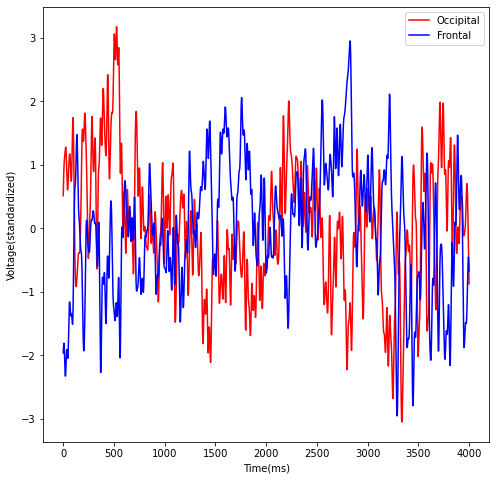

In [20]:
plt.figure(figsize = (8,8))
plt.plot(time,occ,'r')
plt.plot(time,fro,'b')
plt.legend(('Occipital','Frontal'))
plt.xlabel('Time(ms)')
plt.ylabel('Voltage(standardized)')
plt.show()

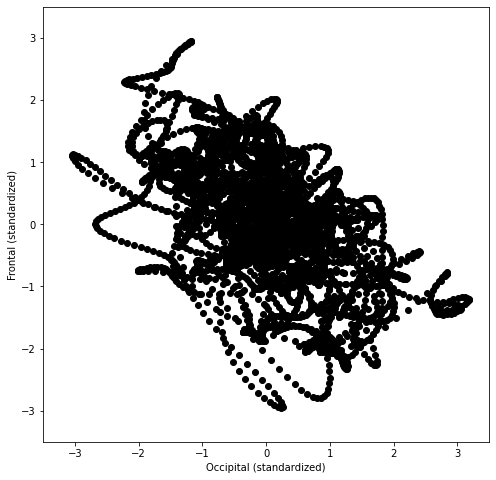

In [21]:
plt.figure(figsize =(8,8))
plt.plot(occ,fro,'ko')
plt.xlabel('Occipital (standardized)')
plt.ylabel('Frontal (standardized)')
plt.xlim((-3.5,3.5))
plt.ylim((-3.5,3.5))
plt.show()

Text(0, 0.5, 'Channel PC2')

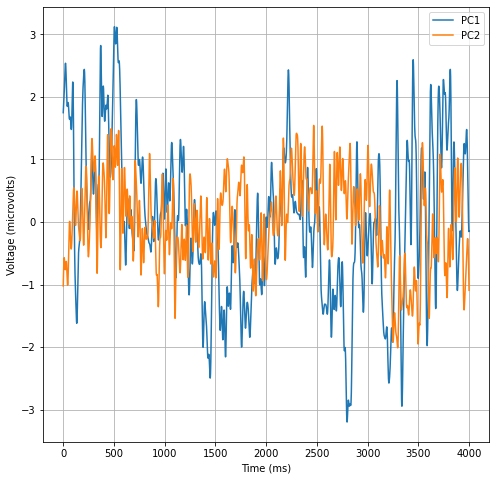

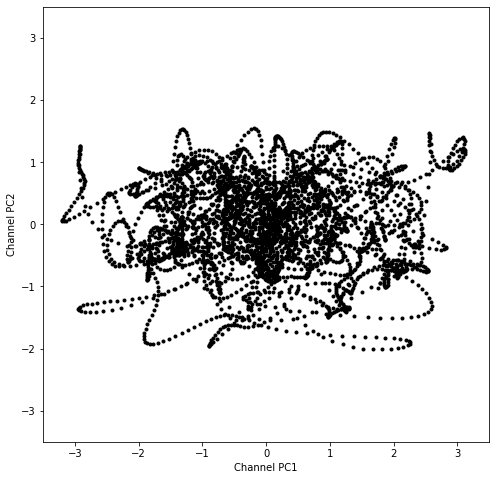

In [22]:
#%% PLOT THE COMPONENT SCORES
plt.figure(figsize = (8,8))
plt.plot(xyprime[0,:],label = 'PC1')
plt.plot(xyprime[1,:],label = 'PC2')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (microvolts)')
plt.grid()
plt.legend()
plt.figure(figsize=(8,8))
plt.plot(xyprime[0,:],xyprime[1,:],'k.')
plt.xlim((-3.5,3.5))
plt.ylim((-3.5,3.5))
plt.xlabel('Channel PC1')
plt.ylabel('Channel PC2')